<a href="https://colab.research.google.com/github/tomervazana/Attraction-Traveler-Matching-Using-GPT-3.5-Turbo-Prompt-Engineering-Siamese-Network-Vector-Search/blob/main/AttractionTravelerSummarizerAndSiameseNetworkVectorSearchPromptingOpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install openai

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install -r rouge/requirements.txt
!pip install rouge-score

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'rouge/requirements.txt'
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=57712a1dd8c25180b6aa7d6cbc848bbeb0c4f0d260b08172ca48b1c3a44c5112
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


# Attraction Text-Summarization model Using GPT-3.5-Turbo model

## Data from [Summarized Attractions HF DS](https://huggingface.co/datasets/Roamify/Summarized-Attractions)

In [ ]:
prompt_attraction = [
    {"role": "system", "content": "You are a helpful attraction summary assistant. You are designed to get an attraction description as an input, and output a JSON which represent a summary on an attraction it should contain: the attraction name, list of the attraction key features, the entry fee. The JSON format need to be {\"name\":\"the name of the attraction\", \"features\": \"feature 1, feature 2, feature 3, ..., feature n\", \"price\": \"the attraction Entry Fee\"}."},
    {"role": "user", "content": "Bangalore Palace Winit deshpande for Wikimedia Commons Built by Chamaraja Wodeyar in the year 1887 Bangalore Palace is an inspired design by England s Windsor Castle and is one of the best tourist places in Bangalore The evocative palace comprises fortified arches towers architecture and green lawns along with sophisticated wood carvings in the interior It is where the royal family still resides at the present This architectural creation is nothing less than an epitome The palace has earned foundations that have been attributed to the Wodeyars of Mysore Location Vasanth Nagar BengaluruTimings Sunday to Monday from 10 00 AM to 5 00 PMEntry Fee INR 230 for Indians INR 460 for foreigners Must Read New Year Party In Bangalore"},
    {"role": "assistant", "content": "{\"name\": \"Bangalore Palace\", \"features\": \"Palace, fortified arches, towers, green lawns, intricate wood carvings\", \"price\": \"INR 230 for Indians INR 460 for foreigners\"}"},
    {"role": "user", "content": "Tipu Sultan s Summer Palace Dineshkannambadi for Wikimedia Commons Located in the most crowded market area Tipu Sultan Fort ideally represents the artistic talent which thrived in the past and is among the most fascinating Bangalore trip places The is the summer heaven of the ruler of Mysore Tipu Sultan The ruler is largely celebrated for the heroics across the battlefield With a large appetite for art and culture the palace is a typical example of the architecture and features sturdy columns along with motifs A perfect example of architecture the palace is the perfect example of architecture Location Albert Victor Road BangaloreTimings Monday to Sunday 8 30AM 5 30 PMEntry Fee INR 15 for Indians and INR 200 for foreigners"},
    {"role": "assistant", "content": "{\"name\": \"Tipu Sultan s\", \"features\": \"Palace, artistic talent, sturdy columns, intricate motifs\", \"price\": \"INR 15 for Indians and INR 200 for foreigners\"}"},
    {"role": "user", "content": "Lal Bagh Botanical Gardens AmanDshutterbug for Wikimedia Commons This botanical garden is one of the most alluring places to visit in Bangalore and perhaps all of India Built by Haider Ali the garden was later modified by Tipu Sultan The garden comprises a glass house which was inspired by the London Crystal Palace Wonderfully spread across a huge land of 240 acres the garden has a large variety of 1800 species of plants trees and herbs Location Mavalli BangaloreTimings Monday to Sunday 6 00 AM to 7 00 PMEntry Fee INR 20 for Indians INR 15 for children Suggested Read Camping Near Bangalore"},
    {"role": "assistant", "content": "{\"name\": \"Lal Bagh Botanical Gardens\", \"features\": \"Palace, glass house, plants, trees, herbs\", \"price\": \"INR 20 for adults and INR 15 for children\"}"},
    {"role": "user", "content": "Nandi Hills Sarangib for Pixabay A perfect location to be one with nature the hills are located 60kms away from the city which makes it an ideal destination if you are preparing a list of places to visit in Bangalore within 100 kms One the most popular viewpoint in Bangalore Nandi Hills is one among the renowned places to visit in Bangalore for couples With river Arkavathi and Palar originating from the hill area it was later named after the famous Nandi Temple and was situated at the top of the hill Situated at a height of 1478 above the sea level it offers a pleasant climate Location Chikkaballapur districtTimings Open all daysEntry Fee No entry fee"},
    {"role": "assistant", "content": "{\"name\": \"Nandi Hills\", \"features\": \"Hills, pleasant climate, picturesque views\", \"price\": \"INR 20 for adults and INR 15 for children\"}"},
    {"role": "user", "content": "Cubbon Park Sarangib for Pixabay Situated over a sprawling 300 acres of land the park was constructed by Richard Sankey This massive green park along with lawns deserves a special mention Offering statues of famous personalities the park is one among the popular places to visit in Bangalore with friends Location Kasturba Road Behind High Court of Karnataka Ambedkar Veedhi Sampangi Rama Nagara BangaloreTimings Open on all daysEntry Fee No entry fee Suggested Read Resorts Near Bangalore"},
    {"role": "assistant", "content": "{\"name\": \"Cubbon Park\", \"features\": \"Green park, lawns, statues of famous personalities\", \"price\": \"INR 20 for adults and INR 15 for children\"}"},
  ]

## LLM Class

In [ ]:
from sk import my_sk
from openai import OpenAI
import time
from rouge_score import rouge_scorer


class attraction_summarizer:
  def __init__(self):
    self.client = OpenAI(api_key=my_sk)
    self.prompt = [
      {"role": "system", "content": "You are a helpful attraction summary assistant. You are designed to get an attraction description as an input, and output a JSON which represent a summary on an attraction it should contain: the attraction name, list of the attraction key features, the entry fee. The JSON format need to be {\"name\":\"the name of the attraction\", \"features\": \"feature 1, feature 2, feature 3, ..., feature n\", \"price\": \"the attraction Entry Fee\"}."},
      {"role": "user", "content": "Bangalore Palace Winit deshpande for Wikimedia Commons Built by Chamaraja Wodeyar in the year 1887 Bangalore Palace is an inspired design by England s Windsor Castle and is one of the best tourist places in Bangalore The evocative palace comprises fortified arches towers architecture and green lawns along with sophisticated wood carvings in the interior It is where the royal family still resides at the present This architectural creation is nothing less than an epitome The palace has earned foundations that have been attributed to the Wodeyars of Mysore Location Vasanth Nagar BengaluruTimings Sunday to Monday from 10 00 AM to 5 00 PMEntry Fee INR 230 for Indians INR 460 for foreigners Must Read New Year Party In Bangalore"},
      {"role": "assistant", "content": "{\"name\": \"Bangalore Palace\", \"features\": \"Palace, fortified arches, towers, green lawns, intricate wood carvings\", \"price\": \"INR 230 for Indians INR 460 for foreigners\"}"},
    ]


  def summarize_attraction(self, texts_to_summarize, project_sk = my_sk):
    res = []
    for text in texts_to_summarize:
      self.prompt.append({"role": "user", "content": text})
      response = self.client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_format={"type": "json_object"},
        messages=self.prompt,
        stream=False  # Use stream=False to get a single completion for each description
      )
      self.prompt.pop()
      if response.choices[0].message.content is not None:
        print(response.choices[0].message.content)
      res.append({"input": text, "output": response.choices[0].message.content})
    return res

  def print_rouge_scores(self, X_val, y_val, res):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    y_cnt = 0
    count = 0
    sum_1, sum_l = 0, 0
    for i in range(len(res)):
      if res[i]['input'] == X_val[y_cnt]['content']:
        train_start, train_end = res[i]['output'].find("\"features\": \"") + 11, res[i]['output'].find("\", \"price\": \"")
        val_start, val_end = y_val[y_cnt]['content'].find("\"features\": \"") + 11, y_val[y_cnt]['content'].find("\", \"price\": \"")
        if 10 < train_start and 0 < train_end and 10 < val_start and 0 < val_end: # 10 < start since we add 11
          scores = scorer.score(res[i]['output'][train_start:train_end], y_val[y_cnt]['content'][val_start:val_end])
          print(scores)
          sum_1 += scores['rouge1'].fmeasure
          sum_l += scores['rougeL'].fmeasure
          count += 1
          if scores['rouge1'].fmeasure < 0.5 or scores['rougeL'].fmeasure < 0.5:
            print(res[i]['output'][train_start:train_end])
            print(y_val[y_cnt]['content'][val_start:val_end])
        else:
          print('else error:', train_start, train_end, val_start, val_end)
        y_cnt += 1
        if y_cnt == len(y_val):
          break
      else:
        print('else error res:', res[i]['input'])
        print('else error val:', X_val[y_cnt]['content'])
    print(scores['rouge1'].fmeasure)
    print(scores['rougeL'].fmeasure)
    sum_1 /= count
    sum_l /= count
    return sum_1, sum_l

## Usage

In [ ]:
att_sum = attraction_summarizer()
descriptions = [
    "Tipu Sultan s Summer Palace Dineshkannambadi for Wikimedia Commons Located in the most crowded market area Tipu Sultan Fort ideally represents the artistic talent which thrived in the past and is among the most fascinating Bangalore trip places The is the summer heaven of the ruler of Mysore Tipu Sultan The ruler is largely celebrated for the heroics across the battlefield With a large appetite for art and culture the palace is a typical example of the architecture and features sturdy columns along with motifs A perfect example of architecture the palace is the perfect example of architecture Location Albert Victor Road BangaloreTimings Monday to Sunday 8 30AM 5 30 PMEntry Fee INR 15 for Indians and INR 200 for foreigners",
    "Lal Bagh Botanical Gardens AmanDshutterbug for Wikimedia Commons This botanical garden is one of the most alluring places to visit in Bangalore and perhaps all of India Built by Haider Ali the garden was later modified by Tipu Sultan The garden comprises a glass house which was inspired by the London Crystal Palace Wonderfully spread across a huge land of 240 acres the garden has a large variety of 1800 species of plants trees and herbs Location Mavalli BangaloreTimings Monday to Sunday 6 00 AM to 7 00 PMEntry Fee INR 20 for Indians INR 15 for children Suggested Read Camping Near Bangalore",
    "Nandi Hills Sarangib for Pixabay A perfect location to be one with nature the hills are located 60kms away from the city which makes it an ideal destination if you are preparing a list of places to visit in Bangalore within 100 kms One the most popular viewpoint in Bangalore Nandi Hills is one among the renowned places to visit in Bangalore for couples With river Arkavathi and Palar originating from the hill area it was later named after the famous Nandi Temple and was situated at the top of the hill Situated at a height of 1478 above the sea level it offers a pleasant climate Location Chikkaballapur districtTimings Open all daysEntry Fee No entry fee",
    "Cubbon Park Sarangib for Pixabay Situated over a sprawling 300 acres of land the park was constructed by Richard Sankey This massive green park along with lawns deserves a special mention Offering statues of famous personalities the park is one among the popular places to visit in Bangalore with friends Location Kasturba Road Behind High Court of Karnataka Ambedkar Veedhi Sampangi Rama Nagara BangaloreTimings Open on all daysEntry Fee No entry fee Suggested Read Resorts Near Bangalore",
]
res_attraction = att_sum.summarize_attraction(descriptions)

{"name": "Tipu Sultan's Summer Palace", "features": "Fort, artistic talent, historic significance, sturdy columns, motifs", "price": "INR 15 for Indians and INR 200 for foreigners"}
{"name": "Lal Bagh Botanical Gardens", "features": "Botanical garden, glass house, 1800 species of plants, trees, and herbs", "price": "INR 20 for Indians INR 15 for children"}
{"name": "Nandi Hills", "features": "Scenic viewpoint, Nandi Temple, River Arkavathi, River Palar, Pleasant climate", "price": "No entry fee"}
{"name": "Cubbon Park", "features": "Sprawling park, statues of famous personalities, spacious lawns", "price": "No entry fee"}


In [ ]:
# import data excluding training
X_val_att = [json_obj for json_obj in prompt_attraction if json_obj['role'] == "user"][1:]
y_val_att = [json_obj for json_obj in prompt_attraction if json_obj['role'] == "assistant"][1:]

In [ ]:
X_val_att

[{'role': 'user',
  'content': 'Tipu Sultan s Summer Palace Dineshkannambadi for Wikimedia Commons Located in the most crowded market area Tipu Sultan Fort ideally represents the artistic talent which thrived in the past and is among the most fascinating Bangalore trip places The is the summer heaven of the ruler of Mysore Tipu Sultan The ruler is largely celebrated for the heroics across the battlefield With a large appetite for art and culture the palace is a typical example of the architecture and features sturdy columns along with motifs A perfect example of architecture the palace is the perfect example of architecture Location Albert Victor Road BangaloreTimings Monday to Sunday 8 30AM 5 30 PMEntry Fee INR 15 for Indians and INR 200 for foreigners'},
 {'role': 'user',
  'content': 'Lal Bagh Botanical Gardens AmanDshutterbug for Wikimedia Commons This botanical garden is one of the most alluring places to visit in Bangalore and perhaps all of India Built by Haider Ali the garden w

In [ ]:
y_val_att

[{'role': 'assistant',
  'content': '{"name": "Tipu Sultan s", "features": "Palace, artistic talent, sturdy columns, intricate motifs", "price": "INR 15 for Indians and INR 200 for foreigners"}'},
 {'role': 'assistant',
  'content': '{"name": "Lal Bagh Botanical Gardens", "features": "Palace, glass house, plants, trees, herbs", "price": "INR 20 for adults and INR 15 for children"}'},
 {'role': 'assistant',
  'content': '{"name": "Nandi Hills", "features": "Hills, pleasant climate, picturesque views", "price": "INR 20 for adults and INR 15 for children"}'},
 {'role': 'assistant',
  'content': '{"name": "Cubbon Park", "features": "Green park, lawns, statues of famous personalities", "price": "INR 20 for adults and INR 15 for children"}'}]

In [ ]:
att_sum.print_rouge_scores(X_val_att, y_val_att, res_attraction)

{'rouge1': Score(precision=0.7142857142857143, recall=0.625, fmeasure=0.6666666666666666), 'rougeL': Score(precision=0.7142857142857143, recall=0.625, fmeasure=0.6666666666666666)}
{'rouge1': Score(precision=0.8333333333333334, recall=0.45454545454545453, fmeasure=0.5882352941176471), 'rougeL': Score(precision=0.8333333333333334, recall=0.45454545454545453, fmeasure=0.5882352941176471)}
{'rouge1': Score(precision=0.4, recall=0.2, fmeasure=0.26666666666666666), 'rougeL': Score(precision=0.4, recall=0.2, fmeasure=0.26666666666666666)}
 "Scenic viewpoint, Nandi Temple, River Arkavathi, River Palar, Pleasant climate
 "Hills, pleasant climate, picturesque views
{'rouge1': Score(precision=0.8571428571428571, recall=0.75, fmeasure=0.7999999999999999), 'rougeL': Score(precision=0.7142857142857143, recall=0.625, fmeasure=0.6666666666666666)}
0.7999999999999999
0.6666666666666666


(0.580392156862745, 0.5470588235294117)

# Traveler Text-Summarization Prompt Engineering Using GPT-3.5-Turbo model

## LLM Class

In [ ]:
from sk import my_sk
from openai import OpenAI
import time
from rouge_score import rouge_scorer


class traveler_summarizer:
  def __init__(self):
    self.client = OpenAI(api_key=my_sk)
    self.prompt = [
      {"role": "system", "content": "You are a helpful traveler summary assistant. You are designed to get an traveler description as an input, and output a JSON which represent a summary of a traveler it should contain: the traveler name, list of the traveler favorite preferences, a budget. The JSON format need to be {\"name\":\"the name of the attraction\", \"favorite_preferences\": \"preference 1, preference 2, preference 3, ..., preference n\", \"budget_range\": \"the traveler budget\"}."},
      {"role": "user", "content": "Hi there! I'm Sam, an architecture enthusiast exploring historical sites with a budget range of INR 200 - INR 400. I enjoy exploring grand architecture and historical artifacts."},
      {"role": "assistant", "content": "{\"name\": \"Sam\", \"favorite_preferences\": \"Architecture enthusiast, historical sites, grand architecture, historical artifacts\", \"budget_range\": \"INR 200 - INR 400\"}"},
    ]


  def summarize_traveler(self, texts_to_summarize, project_sk = my_sk):
    res = []
    print(texts_to_summarize)
    for text in texts_to_summarize:
      self.prompt.append({"role": "user", "content": text})
      response = self.client.chat.completions.create(
        model="gpt-3.5-turbo",
        response_format={"type": "json_object"},
        messages=self.prompt,
        stream=False  # Use stream=False to get a single completion for each description
      )
      self.prompt.pop()
      if response.choices[0].message.content is not None:
        print(response.choices[0].message.content)
      res.append({"input": text, "output": response.choices[0].message.content})
    return res

  def print_rouge_scores(self, X_val, y_val, res):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    y_cnt = 0
    count = 0
    sum_1, sum_l = 0, 0
    constant_str_len = len("\"favorite_preferences\": \"")
    for i in range(len(res)):
      if res[i]['input'] == X_val[y_cnt]['content']:
        train_start, train_end = res[i]['output'].find("\"favorite_preferences\": \"") + constant_str_len, res[i]['output'].find("\", \"budget_range\": \"")
        val_start, val_end = y_val[y_cnt]['content'].find("\"favorite_preferences\": \"") + constant_str_len, y_val[y_cnt]['content'].find("\", \"budget_range\": \"")
        if 10 < train_start and 0 < train_end and 10 < val_start and 0 < val_end: # 10 < start since we add 11
          scores = scorer.score(res[i]['output'][train_start:train_end], y_val[y_cnt]['content'][val_start:val_end])
          print(scores)
          sum_1 += scores['rouge1'].fmeasure
          sum_l += scores['rougeL'].fmeasure
          count += 1
          if scores['rouge1'].fmeasure < 0.5 or scores['rougeL'].fmeasure < 0.5:
            print(res[i]['output'][train_start:train_end])
            print(y_val[y_cnt]['content'][val_start:val_end])
        else:
          print('else error:', train_start, train_end, val_start, val_end)
        y_cnt += 1
        if y_cnt == len(y_val):
          break
      else:
        print('else error res:', res[i]['input'])
        print('else error val:', X_val[y_cnt]['content'])
    print(scores['rouge1'].fmeasure)
    print(scores['rougeL'].fmeasure)
    sum_1 /= count
    sum_l /= count
    return sum_1, sum_l

## Usage

In [ ]:
X_traveler = [
    "Hi there! I'm Sam, an architecture enthusiast exploring historical sites with a budget range of INR 200 - INR 400. I enjoy exploring grand architecture and historical artifacts.",
    "Greetings! I'm Emily, a nature lover with a budget range of INR 150 - INR 300, exploring green spaces and gardens. I appreciate serene environments and diverse plant species.",
    "Hello, I'm Alex, an adventure seeker with a budget range of INR 300 - INR 500, exploring outdoor destinations. I'm drawn to places with scenic beauty and opportunities for outdoor activities.",
    "Hey, I'm Mia, a history buff visiting historical landmarks with a budget range of INR 200 - INR 400. I enjoy exploring cultural heritage and learning about local history.",
    "Hi, I'm Jack, a food enthusiast exploring culinary delights with a budget range of INR 150 - INR 300. I love discovering local flavors and experiencing different cuisines."
]

y_traveler = [
  "{\"name\": \"Sam\", \"favorite_preferences\": \"Architecture enthusiast, historical sites, grand architecture, historical artifacts\", \"budget_range\": \"INR 200 - INR 400\"}",
  "{\"name\": \"Emily\", \"favorite_preferences\": \"Nature lover, green spaces, gardens, serene environments, diverse plant species\", \"budget_range\": \"INR 150 - INR 300\"}",
  "{\"name\": \"Alex\", \"favorite_preferences\": \"Adventure seeker, outdoor destinations, scenic beauty, opportunities for outdoor activities\", \"budget_range\": \"INR 300 - INR 500\"}",
  "{\"name\": \"Mia\", \"favorite_preferences\": \"History buff, historical landmarks, cultural heritage, local history\", \"budget_range\": \"INR 200 - INR 400\"}",
  "{\"name\": \"Jack\", \"favorite_preferences\": \"Food enthusiast, culinary delights, local flavors, experiencing different cuisines\", \"budget_range\": \"INR 150 - INR 300\"}"
]

for json_string in y_traveler:
  print(json_string)

prompt_traveler = [
    {"role": "system", "content": "You are a helpful traveler summary assistant. You are designed to get an traveler description as an input, and output a JSON which represent a summary of a traveler it should contain: the traveler name, list of the traveler favorite preferences, a budget. The JSON format need to be {\"name\":\"the name of the attraction\", \"favorite_preferences\": \"preference 1, preference 2, preference 3, ..., preference n\", \"budget_range\": \"the traveler budget\"}."},
    {"role": "user", "content": X_traveler[0]},
    {"role": "assistant", "content": y_traveler[0]}
]

for i in range(1, len(X_traveler)):
    prompt_traveler.append({"role": "user", "content": X_traveler[i]})
    prompt_traveler.append({"role": "assistant", "content": y_traveler[i]})

{"name": "Sam", "favorite_preferences": "Architecture enthusiast, historical sites, grand architecture, historical artifacts", "budget_range": "INR 200 - INR 400"}
{"name": "Emily", "favorite_preferences": "Nature lover, green spaces, gardens, serene environments, diverse plant species", "budget_range": "INR 150 - INR 300"}
{"name": "Alex", "favorite_preferences": "Adventure seeker, outdoor destinations, scenic beauty, opportunities for outdoor activities", "budget_range": "INR 300 - INR 500"}
{"name": "Mia", "favorite_preferences": "History buff, historical landmarks, cultural heritage, local history", "budget_range": "INR 200 - INR 400"}
{"name": "Jack", "favorite_preferences": "Food enthusiast, culinary delights, local flavors, experiencing different cuisines", "budget_range": "INR 150 - INR 300"}


In [ ]:
traveler_sum = traveler_summarizer()
res_traveler = traveler_sum.summarize_traveler(X_traveler)
print(res_traveler)

["Hi there! I'm Sam, an architecture enthusiast exploring historical sites with a budget range of INR 200 - INR 400. I enjoy exploring grand architecture and historical artifacts.", "Greetings! I'm Emily, a nature lover with a budget range of INR 150 - INR 300, exploring green spaces and gardens. I appreciate serene environments and diverse plant species.", "Hello, I'm Alex, an adventure seeker with a budget range of INR 300 - INR 500, exploring outdoor destinations. I'm drawn to places with scenic beauty and opportunities for outdoor activities.", "Hey, I'm Mia, a history buff visiting historical landmarks with a budget range of INR 200 - INR 400. I enjoy exploring cultural heritage and learning about local history.", "Hi, I'm Jack, a food enthusiast exploring culinary delights with a budget range of INR 150 - INR 300. I love discovering local flavors and experiencing different cuisines."]
{"name": "Sam", "favorite_preferences": "Architecture enthusiast, historical sites, grand archit

In [ ]:
from os import replace
train_start, train_end = res_traveler[0]['output'].find("\"favorite_preferences\": \"") + len("\"favorite_preferences\": \""), res_traveler[0]['output'].find("\", \"budget_range\": \"")
print(res_traveler[0]['output'][train_start:train_end])

Architecture enthusiast, historical sites, grand architecture, historical artifacts


In [ ]:
# remove the train sample

y_trav_val = [json_obj for json_obj in prompt_traveler if json_obj['role'] == "assistant"]
X_trav_val = [json_obj for json_obj in prompt_traveler if json_obj['role'] == "user"]

y_trav_val = y_trav_val[1:]
X_trav_val = X_trav_val[1:]

In [ ]:
traveler_sum.print_rouge_scores(X_trav_val, y_trav_val, res_traveler[1:])

{'rouge1': Score(precision=1.0, recall=1.0, fmeasure=1.0), 'rougeL': Score(precision=1.0, recall=1.0, fmeasure=1.0)}
{'rouge1': Score(precision=0.8, recall=1.0, fmeasure=0.888888888888889), 'rougeL': Score(precision=0.8, recall=1.0, fmeasure=0.888888888888889)}
{'rouge1': Score(precision=1.0, recall=1.0, fmeasure=1.0), 'rougeL': Score(precision=1.0, recall=1.0, fmeasure=1.0)}
{'rouge1': Score(precision=0.8888888888888888, recall=1.0, fmeasure=0.9411764705882353), 'rougeL': Score(precision=0.8888888888888888, recall=1.0, fmeasure=0.9411764705882353)}
0.9411764705882353
0.9411764705882353


(0.957516339869281, 0.957516339869281)

# install vector search and sentence bert (siamese model)

In [ ]:
!pip install faiss 1.5.3

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss


In [ ]:
pip install faiss-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 29.3 MB/s eta 0:00:00


In [ ]:
pip install faiss-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.0 MB/s eta 0:00:00


In [ ]:
pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# siamese model

In [ ]:
const_att = len("\"features\": \"")
# att_start, att_end = res_attraction[i]['output'].find("\"features\": \"") + 11, res_attraction[i]['output'].find("\", \"price\": \"")
features = [res_attraction[i]['output'][res_attraction[i]['output'].find("\"features\": \"") + const_att:res_attraction[i]['output'].find("\", \"price\": \"")] for i in range(len(res_attraction))] # [att_start, att_end]

const_trav = len("\"favorite_preferences\": \"")
# trav_start, trav_end = res_traveler[0]['output'].find("\"favorite_preferences\": \"") + len("\"favorite_preferences\": \""), res_traveler[0]['output'].find("\", \"budget_range\": \"")
favorite_preferences = [res_traveler[i]['output'][res_traveler[i]['output'].find("\"favorite_preferences\": \"") + const_trav:res_traveler[i]['output'].find("\", \"budget_range\": \"")] for i in range(len(res_traveler))]

print(features)
print(favorite_preferences)
merged = features + favorite_preferences
for i in range(len(merged)):
  print(merged[i])


['Fort, artistic talent, historic significance, sturdy columns, motifs', 'Botanical garden, glass house, 1800 species of plants, trees, and herbs', 'Scenic viewpoint, Nandi Temple, River Arkavathi, River Palar, Pleasant climate', 'Sprawling park, statues of famous personalities, spacious lawns']
['Architecture enthusiast, historical sites, grand architecture, historical artifacts', 'Nature lover, green spaces, gardens, serene environments, diverse plant species', 'Adventure seeker, outdoor destinations, scenic beauty, outdoor activities', 'History buff, historical landmarks, cultural heritage, local history', 'Food enthusiast, culinary delights, local flavors, different cuisines']
Fort, artistic talent, historic significance, sturdy columns, motifs
Botanical garden, glass house, 1800 species of plants, trees, and herbs
Scenic viewpoint, Nandi Temple, River Arkavathi, River Palar, Pleasant climate
Sprawling park, statues of famous personalities, spacious lawns
Architecture enthusiast, h

In [ ]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = merged

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [9, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(9, 384)


In [ ]:
# show sim matrix, note that the len of features is the delimiter if a node belongs to attraction or traveler
print(similarities)

tensor([[1.0000, 0.2902, 0.2028, 0.3909, 0.5103, 0.2795, 0.2819, 0.4502, 0.2707],
        [0.2902, 1.0000, 0.2530, 0.2963, 0.2752, 0.5781, 0.3059, 0.2443, 0.2495],
        [0.2028, 0.2530, 1.0000, 0.2807, 0.3404, 0.3112, 0.4432, 0.3635, 0.2004],
        [0.3909, 0.2963, 0.2807, 1.0000, 0.3691, 0.4241, 0.3740, 0.3375, 0.1503],
        [0.5103, 0.2752, 0.3404, 0.3691, 1.0000, 0.3030, 0.4992, 0.6585, 0.3915],
        [0.2795, 0.5781, 0.3112, 0.4241, 0.3030, 1.0000, 0.5378, 0.3167, 0.4077],
        [0.2819, 0.3059, 0.4432, 0.3740, 0.4992, 0.5378, 1.0000, 0.4362, 0.4676],
        [0.4502, 0.2443, 0.3635, 0.3375, 0.6585, 0.3167, 0.4362, 1.0000, 0.3910],
        [0.2707, 0.2495, 0.2004, 0.1503, 0.3915, 0.4077, 0.4676, 0.3910, 1.0000]])


# vector search

In [ ]:
import faiss
d = 384  # Dimensionality of the vectors
index = faiss.IndexFlatL2(d)  # Build a flat (CPU) index
index.add(embeddings)  # Add vectors to the index

query_idx = 1  # Index of the query vector
query_vec = embeddings[query_idx].reshape(1,d) # shape (1,384)

D, I = index.search(query_vec, 3)  # Search for k nearest neighbors
print(D)
print(I)

[[0.        0.8438151 1.3881412]]
[[1 5 6]]


In [ ]:
D, I = index.search(query_vec, 3)  # Search for k nearest neighbors
print(D)
print(I)

[[0.        0.8438151 1.3881412]]
[[1 5 6]]


In [ ]:
print(len(I[0]))

3


In [ ]:
indicies_to_match = [I[0][i]-len(features)-1 for i in range(len(I[0])) if I[0][i] > len(features)-1] # filter the elements that belong to attraction

In [ ]:
indicies_to_match

[0, 1]

# show top-x best fit travelers to attraction idx = query_idx

In [ ]:
favorite_preferences_filtered = [favorite_preferences[i] for i in indicies_to_match]
print(features[query_idx])
print(favorite_preferences_filtered)

Botanical garden, glass house, 1800 species of plants, trees, and herbs
['Architecture enthusiast, historical sites, grand architecture, historical artifacts', 'Nature lover, green spaces, gardens, serene environments, diverse plant species']


In [ ]:
# relation from summary
print(res_attraction[query_idx]['output'])
res_traveler_filtered = [res_traveler[i] for i in indicies_to_match]
for traveler in res_traveler_filtered:
  print(traveler['output'])

{"name": "Lal Bagh Botanical Gardens", "features": "Botanical garden, glass house, 1800 species of plants, trees, and herbs", "price": "INR 20 for Indians INR 15 for children"}
{"name": "Sam", "favorite_preferences": "Architecture enthusiast, historical sites, grand architecture, historical artifacts", "budget_range": "INR 200 - INR 400"}
{"name": "Emily", "favorite_preferences": "Nature lover, green spaces, gardens, serene environments, diverse plant species", "budget_range": "INR 150 - INR 300"}


In [ ]:
# relation from origin
print(res_attraction[query_idx]['input'])
res_traveler_filtered = [res_traveler[i] for i in indicies_to_match]
for traveler in res_traveler_filtered:
  print(traveler['input'])

Lal Bagh Botanical Gardens AmanDshutterbug for Wikimedia Commons This botanical garden is one of the most alluring places to visit in Bangalore and perhaps all of India Built by Haider Ali the garden was later modified by Tipu Sultan The garden comprises a glass house which was inspired by the London Crystal Palace Wonderfully spread across a huge land of 240 acres the garden has a large variety of 1800 species of plants trees and herbs Location Mavalli BangaloreTimings Monday to Sunday 6 00 AM to 7 00 PMEntry Fee INR 20 for Indians INR 15 for children Suggested Read Camping Near Bangalore
Hi there! I'm Sam, an architecture enthusiast exploring historical sites with a budget range of INR 200 - INR 400. I enjoy exploring grand architecture and historical artifacts.
Greetings! I'm Emily, a nature lover with a budget range of INR 150 - INR 300, exploring green spaces and gardens. I appreciate serene environments and diverse plant species.


# Cost of testing API calls
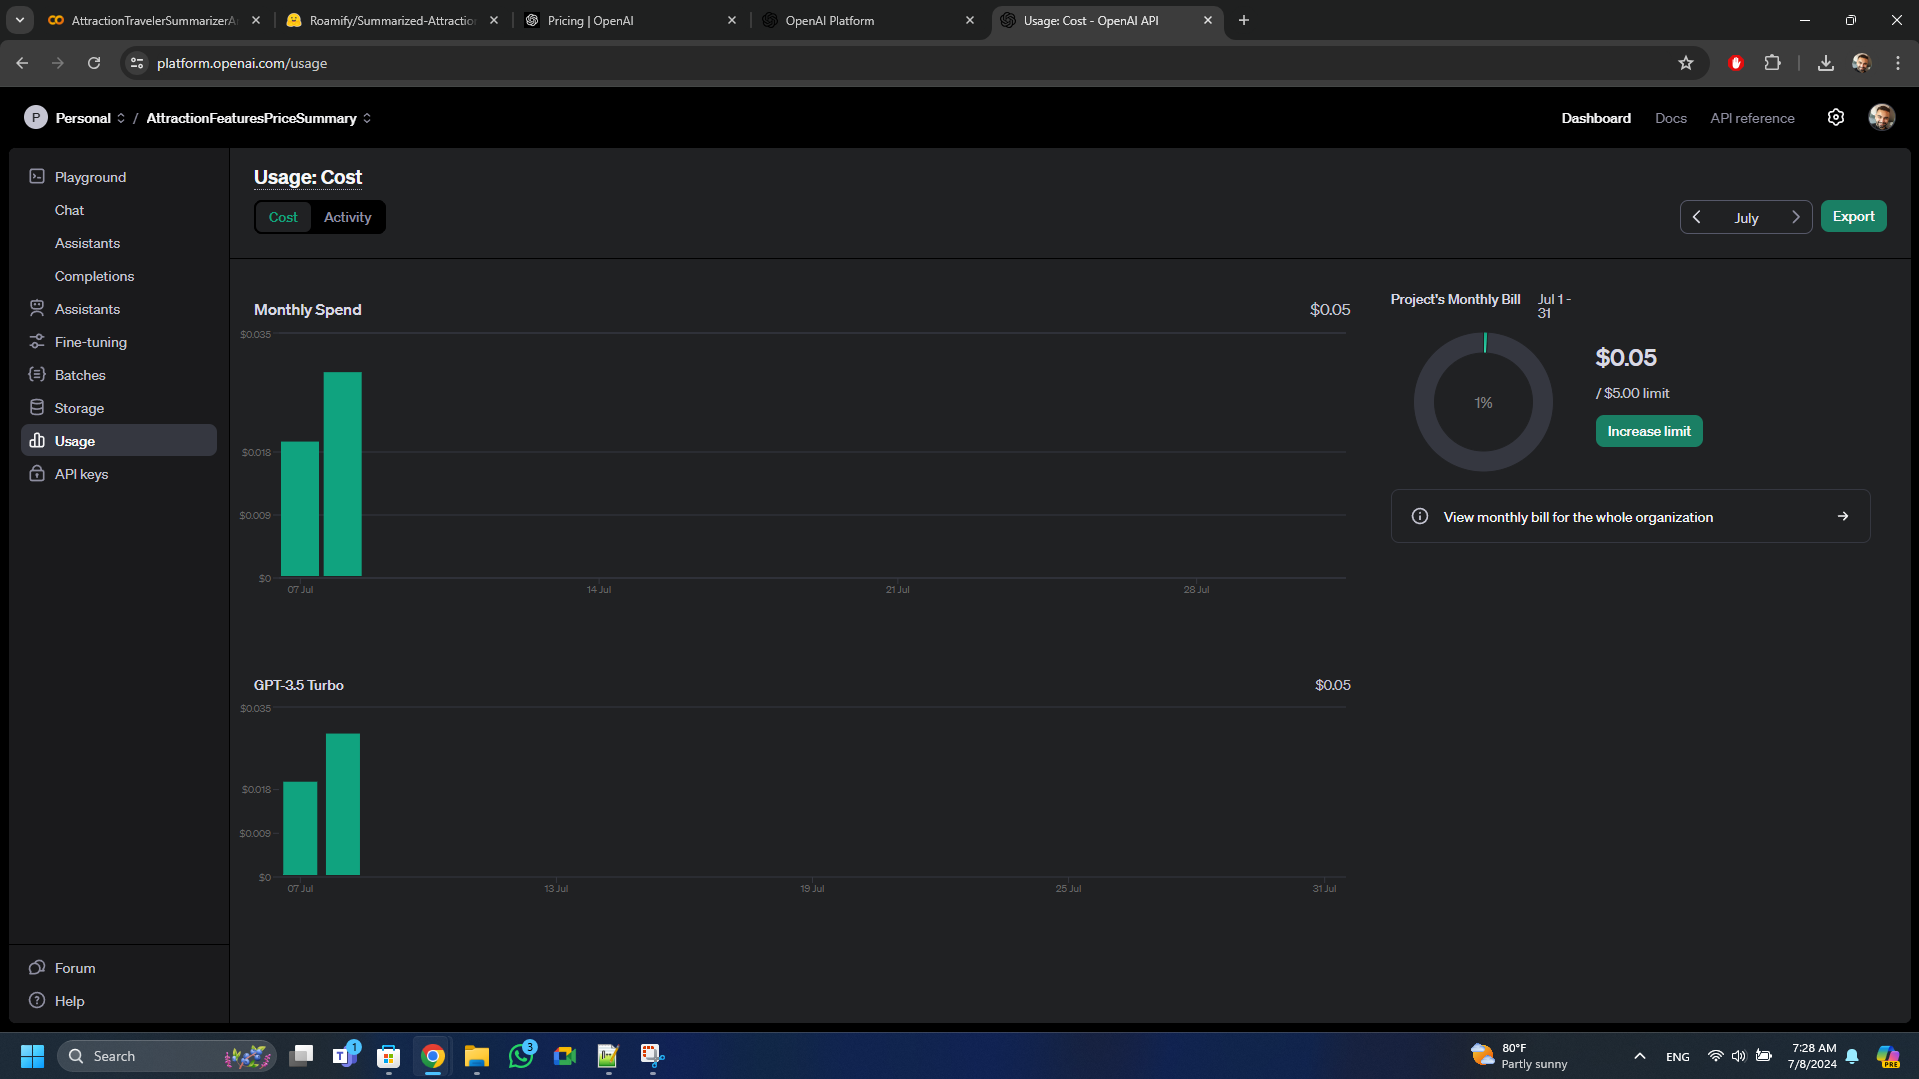